# Geerstma (1973) model

This model computes the stresses associated with a step change in pore pressure in a cylindrical reservoir embedded in an elastic half-space. 


In [7]:
from matplotlib import rcParams
rcParams['font.family'] = 'Avenir'
rcParams['font.size'] = 18
import matplotlib.pyplot as plt

import numpy as np
import scipy.integrate as integrate
import scipy.special as sp
import time 

## Constants

In [8]:
nu = 0.25               # Poisson's ratio
alpha = 1               # Biot coefficient
R = 1000                # Aquifer radius [m]
d = 5                   # Aquifer depth from ice surface to water table [m]
b = 25                  # Aquifer thickness [m]
c = d + b/2             # Depth of aquifer center [m]
rho = 1000              # Water density [kg/m^3]
g = 10                  # Gravitational constant [m/s^2]
delta_p = 0.5*rho*g*b   # Change in pore water pressure [Pa]

## Spatial domain and stress variables

In [13]:
# r = np.array([0.1, 10.1]) 
# z = np.array([17.1, 18.1]) 

r = np.arange(0.1,2*R,10) 
z = np.arange(0.1,8*b,1)

sigma_rr = np.empty([r.shape[0],z.shape[0]])
sigma_phi_phi = np.empty([r.shape[0],z.shape[0]])

## Compute stresses

``integrate.quad`` is running quite slow here because the limit (upper bound on the number of subintervals used in the adaptive algorithm) had to be increased from the default 50 to 1000 and epsabs (absolute error tolerance) had to be decreased from the default 1.49e-8 to 1e-10 in order for the integrals to more or less converge (there are still a few "glitches" visible in the stress plots). 

10/20/2022: The limit parameter has to be set even higher at ~7500 around the singularity at z = c. The finer the resolution, the larger the limit has to be. 

In [30]:
start_time = time.time()

for i in np.arange(r.shape[0]):
    print("i = ",i)
    for j in np.arange(z.shape[0]):
        #print("j = ",j)
        if z[j]>c:
            epsilon = -1
        else:
            epsilon = 1
        
        q_alt = -epsilon*(z[j]-c)
        q = z[j]+c
        
        if np.abs(z[j]-c)<2 or i == 0:
            n_limit = 7500
        else:
            n_limit = 1000
            
        I_1,err = integrate.quad(lambda x: np.exp(-q_alt*x)*x*sp.jv(1,x*R)*sp.jv(0,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)
        I_2,err = integrate.quad(lambda x: np.exp(-q*x)*x*sp.jv(1,x*R)*sp.jv(0,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)
        I_3,err = integrate.quad(lambda x: np.exp(-q*x)*(x**2)*sp.jv(1,x*R)*sp.jv(0,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)
        I_4,err = integrate.quad(lambda x: np.exp(-q_alt*x)*sp.jv(1,x*R)*sp.jv(1,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)
        I_5,err = integrate.quad(lambda x: np.exp(-q*x)*sp.jv(1,x*R)*sp.jv(1,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)
        I_6,err = integrate.quad(lambda x: np.exp(-q*x)*x*sp.jv(1,x*R)*sp.jv(1,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)
            
        sigma_rr[i,j] = alpha*(1-2*nu)/(2*(1-nu))*R*b*delta_p*((I_1+3*I_2-2*z[j]*I_3)-(1/r[i])*(I_4+(3-4*nu)*I_5-2*z[j]*I_6));
        sigma_phi_phi[i,j] = alpha*(1-2*nu)/(2*(1-nu))*R*b*delta_p*(4*nu*I_2+1/r[i]*(I_4+(3-4*nu)*I_5-2*z[j]*I_6));
       
    
end_time = time.time()    
elapsed_time = end_time - start_time
print('Execution time:', elapsed_time, 'seconds')
        

i =  0


/var/folders/vr/ys7d0t4j1_dcz_mxm3yz09v40000gn/T/ipykernel_9729/2039684502.py:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_1,err = integrate.quad(lambda x: np.exp(-q_alt*x)*x*sp.jv(1,x*R)*sp.jv(0,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)


i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19
i =  20
i =  21
i =  22
i =  23
i =  24
i =  25


/var/folders/vr/ys7d0t4j1_dcz_mxm3yz09v40000gn/T/ipykernel_9729/2039684502.py:20: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_1,err = integrate.quad(lambda x: np.exp(-q_alt*x)*x*sp.jv(1,x*R)*sp.jv(0,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)


i =  26
i =  27
i =  28
i =  29
i =  30
i =  31
i =  32
i =  33


/var/folders/vr/ys7d0t4j1_dcz_mxm3yz09v40000gn/T/ipykernel_9729/2039684502.py:20: IntegrationWarning: The maximum number of subdivisions (7500) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_1,err = integrate.quad(lambda x: np.exp(-q_alt*x)*x*sp.jv(1,x*R)*sp.jv(0,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)


i =  34
i =  35
i =  36
i =  37
i =  38
i =  39
i =  40
i =  41
i =  42
i =  43
i =  44


/var/folders/vr/ys7d0t4j1_dcz_mxm3yz09v40000gn/T/ipykernel_9729/2039684502.py:23: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_4,err = integrate.quad(lambda x: np.exp(-q_alt*x)*sp.jv(1,x*R)*sp.jv(1,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)


i =  45
i =  46
i =  47
i =  48
i =  49
i =  50
i =  51
i =  52
i =  53
i =  54
i =  55
i =  56
i =  57
i =  58
i =  59
i =  60
i =  61
i =  62
i =  63
i =  64
i =  65
i =  66


/var/folders/vr/ys7d0t4j1_dcz_mxm3yz09v40000gn/T/ipykernel_9729/2039684502.py:22: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I_3,err = integrate.quad(lambda x: np.exp(-q*x)*(x**2)*sp.jv(1,x*R)*sp.jv(0,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)


i =  67
i =  68
i =  69
i =  70
i =  71
i =  72
i =  73
i =  74
i =  75
i =  76
i =  77
i =  78
i =  79
i =  80
i =  81
i =  82
i =  83
i =  84
i =  85
i =  86
i =  87
i =  88


/var/folders/vr/ys7d0t4j1_dcz_mxm3yz09v40000gn/T/ipykernel_9729/2039684502.py:23: IntegrationWarning: The maximum number of subdivisions (7500) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_4,err = integrate.quad(lambda x: np.exp(-q_alt*x)*sp.jv(1,x*R)*sp.jv(1,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)


i =  89
i =  90
i =  91
i =  92
i =  93
i =  94
i =  95


/var/folders/vr/ys7d0t4j1_dcz_mxm3yz09v40000gn/T/ipykernel_9729/2039684502.py:23: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_4,err = integrate.quad(lambda x: np.exp(-q_alt*x)*sp.jv(1,x*R)*sp.jv(1,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)


i =  96
i =  97
i =  98
i =  99
i =  100
i =  101
i =  102
i =  103
i =  104
i =  105
i =  106
i =  107
i =  108
i =  109
i =  110
i =  111
i =  112
i =  113
i =  114
i =  115
i =  116
i =  117
i =  118
i =  119
i =  120
i =  121
i =  122
i =  123
i =  124
i =  125
i =  126
i =  127
i =  128
i =  129
i =  130
i =  131
i =  132
i =  133
i =  134
i =  135
i =  136
i =  137
i =  138
i =  139
i =  140
i =  141
i =  142
i =  143
i =  144
i =  145
i =  146
i =  147
i =  148
i =  149
i =  150
i =  151
i =  152
i =  153
i =  154
i =  155
i =  156
i =  157
i =  158
i =  159
i =  160
i =  161
i =  162
i =  163
i =  164
i =  165


/var/folders/vr/ys7d0t4j1_dcz_mxm3yz09v40000gn/T/ipykernel_9729/2039684502.py:20: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I_1,err = integrate.quad(lambda x: np.exp(-q_alt*x)*x*sp.jv(1,x*R)*sp.jv(0,x*r[i]),0,np.inf,limit = n_limit,epsabs=1e-10)


i =  166
i =  167
i =  168
i =  169
i =  170
i =  171
i =  172
i =  173
i =  174
i =  175
i =  176
i =  177
i =  178
i =  179
i =  180
i =  181
i =  182
i =  183
i =  184
i =  185
i =  186
i =  187
i =  188
i =  189
i =  190
i =  191
i =  192
i =  193
i =  194
i =  195
i =  196
i =  197
i =  198
i =  199
Execution time: 4258.183002948761 seconds


## Plots

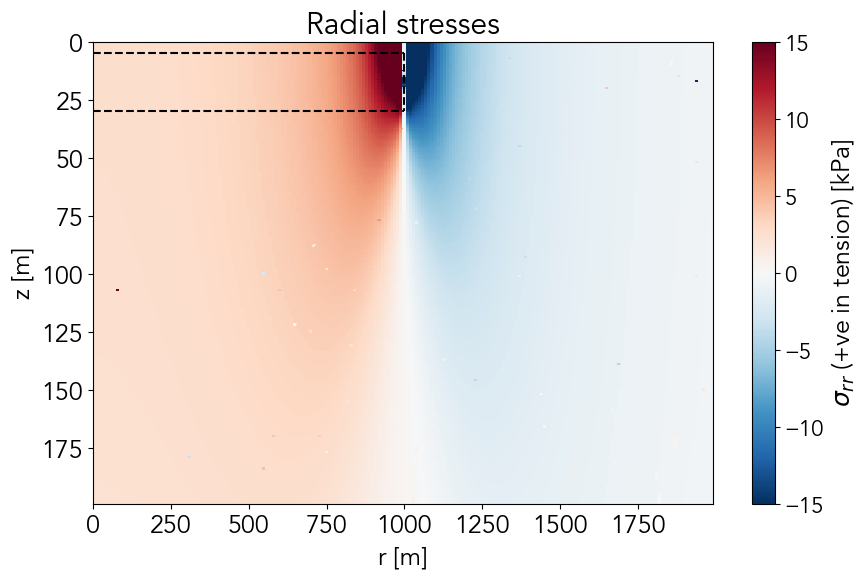

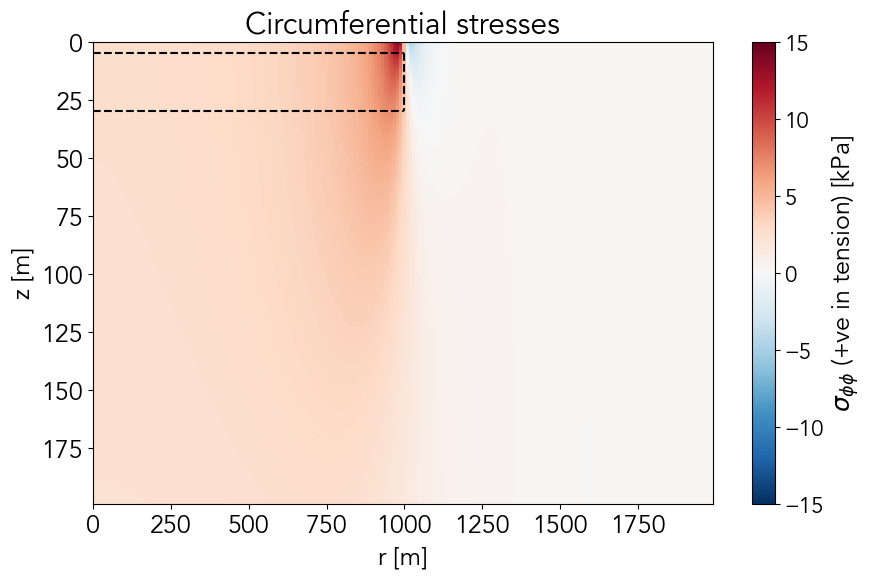

In [31]:
fig, ax = plt.subplots(figsize = (10,6))

plt.pcolor(r,z,np.transpose(sigma_rr)/1e3,cmap="RdBu_r",vmin = -15, vmax = 15)
cb = plt.colorbar(ax=ax)
cb.set_label(label="$\sigma_{rr}$ (+ve in tension) [kPa]")
cb.ax.tick_params(labelsize=16)

plt.plot([0,R],[d,d],'--k')
plt.plot([0,R],[d+b, d+b],'--k')
plt.plot([R,R],[d, d+b],'--k')

ax.set_xlabel("r [m]")
ax.set_ylabel("z [m]")
ax.set_title("Radial stresses")
plt.xlim(0,np.max(r))
plt.ylim(np.max(z),0)

plt.show()

fig, ax = plt.subplots(figsize = (10,6))

plt.pcolor(r,z,np.transpose(sigma_phi_phi)/1e3,cmap="RdBu_r",vmin = -15, vmax = 15)
cb = plt.colorbar(ax=ax)
cb.set_label(label="$\sigma_{\phi\phi}$ (+ve in tension) [kPa]")
cb.ax.tick_params(labelsize=16)

plt.plot([0,R],[d,d],'--k')
plt.plot([0,R],[d+b, d+b],'--k')
plt.plot([R,R],[d, d+b],'--k')

ax.set_xlabel("r [m]")
ax.set_ylabel("z [m]")
ax.set_title("Circumferential stresses")
plt.xlim(0,np.max(r))
plt.ylim(np.max(z),0)

plt.show()